In [1]:
from lifelines.datasets import load_rossi
rossi = load_rossi()

In [2]:
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [109]:
# let's b-spline age
from patsy import dmatrix
from patsy import build_design_matrices 


design = dmatrix("fin + bs(age, df=4) + wexp + mar + paro + prio - 1", data=rossi, return_type="matrix")
transformed_rossi = pd.DataFrame(design, columns=design.design_info.column_names)
transformed_rossi['week'] = rossi['week']
transformed_rossi['arrest'] = rossi['arrest']

In [110]:
cph = CoxPHFitter().fit(transformed_rossi, "week", "arrest")

In [111]:
# now we need to "extend" our data to plot it
# we'll plot age over it's observed range
age_range = np.linspace(rossi['age'].min(), rossi['age'].max(), 50)

# need to create a matrix of variables at their means, _except_ for age. 
x_bar = rossi.drop(["week", "arrest"], axis=1).mean(0).to_frame().T
new_data = pd.concat([x_bar] * 50).reset_index()
new_data['age'] = age_range

predict_on = build_design_matrices([design.design_info], new_data, return_type="dataframe")[0]

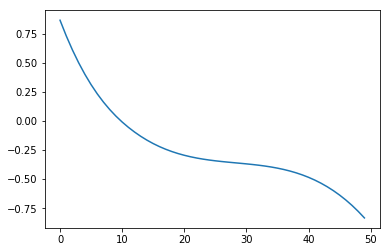

In [112]:
cph.predict_log_partial_hazard(predict_on).plot()